# Binning
* Data binning is a type of data preprocessing, a mechanism which includes also dealing with missing values, formatting, normalization and standardization.
* Binning, also called discretization, is a technique for reducing the cardinality of continuous and discrete data. In other words, it replaces values contained into a small interval with a single representative value for that interval.
* Binning groups related values together in bins to reduce the number of distinct values.
* Binning can improve model quality by strengthening the relationship between attributes.

In [1]:
# Importing pandas and numpy libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [2]:
# First we create a sample DataFrame
scoreList = {
    'Name':['George','Andrea','micheal','maggie','Ravi','Xien','Jalpa','Tyieren'],
    'Score':[63,48,56,75,32,77,89,22]

   }

scoreDF = pd.DataFrame(scoreList,columns=['Name','Score'])
print(scoreDF)

      Name  Score
0   George     63
1   Andrea     48
2  micheal     56
3   maggie     75
4     Ravi     32
5     Xien     77
6    Jalpa     89
7  Tyieren     22


One of the most common instances of binning is done behind the scenes for you when creating a histogram. The histogram below of students test scores, shows how a continuous set of test scores can be divided into discrete bins (for example: 22, 32, 48, 56, 63, 75, 77, 89) and then used to group and count account instances.

<Axes: ylabel='Frequency'>

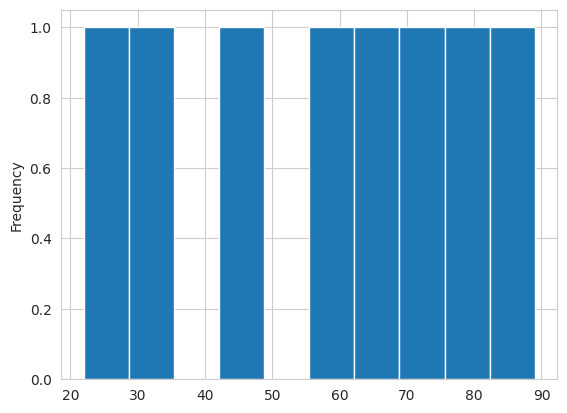

In [3]:
scoreDF['Score'].plot(kind='hist')

In [4]:
scoreDF.value_counts()

Name     Score
Andrea   48       1
George   63       1
Jalpa    89       1
Ravi     32       1
Tyieren  22       1
Xien     77       1
maggie   75       1
micheal  56       1
dtype: int64

There are many other scenarios where you may want to define your own bins. In the example above, there are 7 bins with data. What if we wanted to divide our students' score into 3, 4 or 5 groupings?

Pandas library has two useful functions `cut` and `qcut` for data binning.

Binning can be applied to convert numeric values to categorical or to sample (quantise) numeric values.

* **convert numeric to categorical** includes `binning by distance` (cut()) and `binning by frequency` (qcut())
* **reduce numeric values** includes `quantisation (or sampling)`.

## Binning by distance
To perform binning by distance, we need to define the edges of each bin. After defining the edges, we use the Pandas `cut()` method to form the bins.

We group values related to the score column into five groups: fail, pass, credit, distinction, high_distinction. In order to do it, we need to calculate the intervals within each group falls. We calculate the interval range as the difference between the maximum and minimum value and then we split this interval into five parts, one for each group. We use the functions min() and max() of dataframe to calculate the minimum value and the maximum value of the column Score.

In [5]:
minValue = scoreDF['Score'].min()
maxValue = scoreDF['Score'].max()
print(minValue)
print(maxValue)

22
89


Next, we can calculate the range of each interval, that is, the minimum and maximum value of each interval. Since we have 5 groups, we need 6 edges of intervals (bins):

* fail — (edge1, edge2)
* pass — (edge2, edge3)
* credit — (edge3, edge4)
* distinction - (edge4, edge5)
* high_distinction - (edge5, edge6)

We can use the `linspace()` method of the numpy package to calculate the 5 bins that are equally distributed.

In [6]:
scoreBins = np.linspace(minValue,maxValue, 6)
scoreBins

array([22. , 35.4, 48.8, 62.2, 75.6, 89. ])

In [7]:
# Next, we define the labels
labels = ['Bin1', 'Bin2', 'Bin3', 'Bin4', 'Bin5']

Next, we use the cut() function to convert the numeric values of the column Score into the categorical values. We need to specify the scoreBins and the labels. In addition, we set the parameter include_lowest to True in order to include also the minimum value.

In [8]:
scoreDF['scoreBins'] = pd.cut(scoreDF['Score'], bins=scoreBins, labels=labels, include_lowest=True)

In [9]:
scoreDF.describe()

,Score
count,8.000000
mean,57.750000
std,23.026382
min,22.000000
25%,44.000000
50%,59.500000
75%,75.500000
max,89.000000


In [10]:
scoreDF.value_counts()

Name     Score  scoreBins
Andrea   48     Bin2         1
George   63     Bin4         1
Jalpa    89     Bin5         1
Ravi     32     Bin1         1
Tyieren  22     Bin1         1
Xien     77     Bin5         1
maggie   75     Bin4         1
micheal  56     Bin3         1
dtype: int64

(array([2., 1., 1., 2., 2.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]),
 <BarContainer object of 5 artists>)

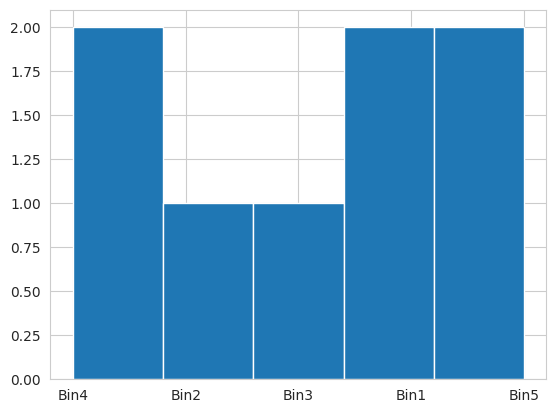

In [11]:
plt.hist(scoreDF['scoreBins'], bins=5)

Alternatively, we can set the edges of each bin manually.

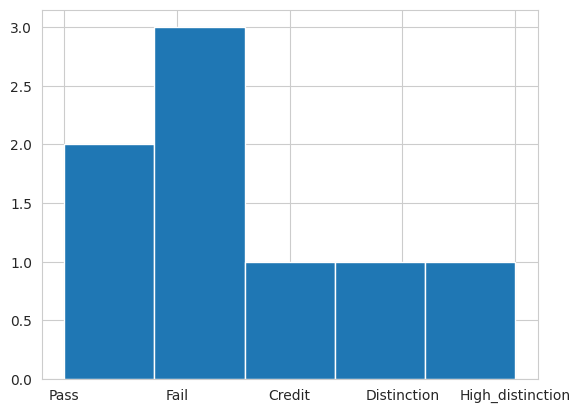

In [12]:
scoreBinsManual = [ 0, 50, 65, 75, 85, 100 ]
labelsManual = ['Fail', 'Pass', 'Credit', 'Distinction', 'High_distinction']
scoreDF['scoreBinsManual'] = pd.cut(scoreDF['Score'] , bins=scoreBinsManual, labels=labelsManual, include_lowest=True)
plt.hist(scoreDF['scoreBinsManual'], bins=5)
plt.show()

In [13]:
scoreDF.value_counts()

Name     Score  scoreBins  scoreBinsManual 
Andrea   48     Bin2       Fail                1
George   63     Bin4       Pass                1
Jalpa    89     Bin5       High_distinction    1
Ravi     32     Bin1       Fail                1
Tyieren  22     Bin1       Fail                1
Xien     77     Bin5       Distinction         1
maggie   75     Bin4       Credit              1
micheal  56     Bin3       Pass                1
dtype: int64

In [14]:
scoreDF.describe()

,Score
count,8.000000
mean,57.750000
std,23.026382
min,22.000000
25%,44.000000
50%,59.500000
75%,75.500000
max,89.000000


## Binning by frequency
Binning by frequency calculates the size of each bin so that each bin contains the (almost) same number of observations, but the bin range will vary. We can use the Python pandas `qcut()` method. We can set the precision parameter to define the number of decimal points.

In [15]:
quatileLabels = ['Quatile 1', 'Quatile 2', 'Quatile 3', 'Quatile 4', 'Quatile 5']
scoreDF['binQcut'] = pd.qcut(scoreDF['Score'], q=5, precision=1, labels=quatileLabels)

In [16]:
scoreDF.value_counts()

Name     Score  scoreBins  scoreBinsManual   binQcut  
Andrea   48     Bin2       Fail              Quatile 2    1
George   63     Bin4       Pass              Quatile 3    1
Jalpa    89     Bin5       High_distinction  Quatile 5    1
Ravi     32     Bin1       Fail              Quatile 1    1
Tyieren  22     Bin1       Fail              Quatile 1    1
Xien     77     Bin5       Distinction       Quatile 5    1
maggie   75     Bin4       Credit            Quatile 4    1
micheal  56     Bin3       Pass              Quatile 3    1
dtype: int64

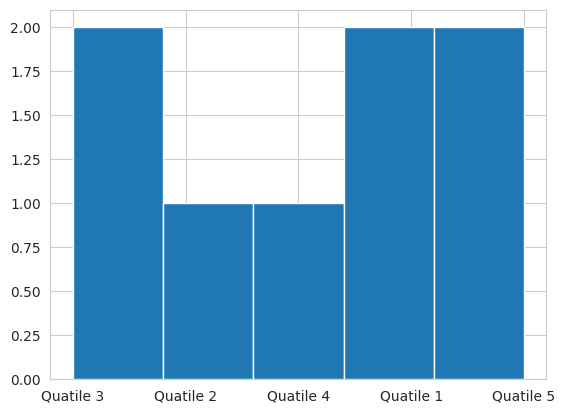

In [17]:
plt.hist(scoreDF['binQcut'], bins=5)
plt.show()


In [18]:
scoreDF.describe()

,Score
count,8.000000
mean,57.750000
std,23.026382
min,22.000000
25%,44.000000
50%,59.500000
75%,75.500000
max,89.000000


### More examples

In [19]:
myDf = pd.DataFrame(\
                   {"A": [181, 239, 235, 219, 217, 123, 260, 100, 300, 168, 149, 186],\
                    "B": pd.Timestamp('20220717'),\
                    "C": pd.Series(1, index=list(range(12)), dtype = 'float32'),\
                    "D": np.array(np.random.randn(12)),\
                    "E": pd.Categorical(["Test", "Train", "Test", "Test", "Train", "Train",\
                                         "Train", "Test", "Train", "Train", "Test", "Test"]),\
                    "F": "Hello",
                   }
)
print(myDf)

      A          B    C         D      E      F
0   181 2022-07-17  1.0 -1.218999   Test  Hello
1   239 2022-07-17  1.0  0.533321  Train  Hello
2   235 2022-07-17  1.0  0.924944   Test  Hello
3   219 2022-07-17  1.0  2.172672   Test  Hello
4   217 2022-07-17  1.0 -0.697507  Train  Hello
5   123 2022-07-17  1.0  0.486061  Train  Hello
6   260 2022-07-17  1.0 -0.585812  Train  Hello
7   100 2022-07-17  1.0 -0.363637   Test  Hello
8   300 2022-07-17  1.0 -1.341376  Train  Hello
9   168 2022-07-17  1.0  1.123152  Train  Hello
10  149 2022-07-17  1.0 -0.804236   Test  Hello
11  186 2022-07-17  1.0 -0.140156   Test  Hello


In [20]:
# The size of bins are determined such that equal data sample are divided into equal sized bins.
# This is done using Quantile. For example, if there are 5 bins, the dataset is divided into
# five quatiles. Each quatile containing 20% of total area of distribution.
#
# For example,
myDf = pd.DataFrame(\
                   {"A": [181, 239, 235, 219, 217, 123, 260, 100, 300, 168, 149, 186],\
                    "B": pd.Timestamp('20220717'),\
                    "C": pd.Series(1, index=list(range(12)), dtype = 'float32'),\
                    "D": np.array(np.random.randn(12)),\
                    "E": pd.Categorical(["Test", "Train", "Test", "Test", "Train", "Train",\
                                         "Train", "Test", "Train", "Train", "Test", "Test"]),\
                    "F": "Hello",
                   }
)
print(myDf)

      A          B    C         D      E      F
0   181 2022-07-17  1.0  0.571575   Test  Hello
1   239 2022-07-17  1.0  0.199763  Train  Hello
2   235 2022-07-17  1.0  0.692548   Test  Hello
3   219 2022-07-17  1.0 -0.188437   Test  Hello
4   217 2022-07-17  1.0 -0.708388  Train  Hello
5   123 2022-07-17  1.0 -0.612533  Train  Hello
6   260 2022-07-17  1.0  0.071823  Train  Hello
7   100 2022-07-17  1.0  0.507959   Test  Hello
8   300 2022-07-17  1.0 -0.751922  Train  Hello
9   168 2022-07-17  1.0  2.031729  Train  Hello
10  149 2022-07-17  1.0  0.120484   Test  Hello
11  186 2022-07-17  1.0 -0.054002   Test  Hello


We group values related to the column Cupcake into three groups: small, medium and big. In order to do it, we need to calculate the intervals within each group falls. We calculate the interval range as the difference between the maximum and minimum value and then we split this interval into three parts, one for each group. We exploit the functions min() and max() of dataframe to calculate the minimum value and the maximum value of the column Cupcake.

In [21]:
# Defining a function binning for reusability
def binning(data, numOfBin, col):
    data[col] = pd.cut(data[col], numOfBin, labels=range(1,numOfBin+1))
    return data

In [22]:
binning(myDf, 5, 'A')
print()
print(myDf)


    A          B    C         D      E      F
0   3 2022-07-17  1.0  0.571575   Test  Hello
1   4 2022-07-17  1.0  0.199763  Train  Hello
2   4 2022-07-17  1.0  0.692548   Test  Hello
3   3 2022-07-17  1.0 -0.188437   Test  Hello
4   3 2022-07-17  1.0 -0.708388  Train  Hello
5   1 2022-07-17  1.0 -0.612533  Train  Hello
6   4 2022-07-17  1.0  0.071823  Train  Hello
7   1 2022-07-17  1.0  0.507959   Test  Hello
8   5 2022-07-17  1.0 -0.751922  Train  Hello
9   2 2022-07-17  1.0  2.031729  Train  Hello
10  2 2022-07-17  1.0  0.120484   Test  Hello
11  3 2022-07-17  1.0 -0.054002   Test  Hello


(array([2., 2., 4., 3., 1.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <BarContainer object of 5 artists>)

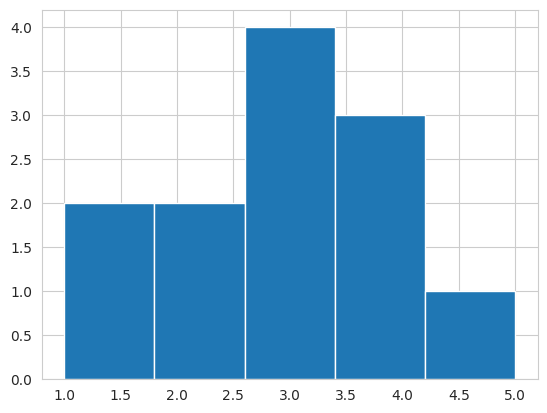

In [23]:
plt.hist(myDf['A'], bins=5)

In [24]:
# Binning directly to a specific column
numOfBin = 5
myDf['D'] = pd.cut(myDf['D'], numOfBin,labels = range(1,numOfBin+1))
print()
print(myDf)


    A          B    C  D      E      F
0   3 2022-07-17  1.0  3   Test  Hello
1   4 2022-07-17  1.0  2  Train  Hello
2   4 2022-07-17  1.0  3   Test  Hello
3   3 2022-07-17  1.0  2   Test  Hello
4   3 2022-07-17  1.0  1  Train  Hello
5   1 2022-07-17  1.0  1  Train  Hello
6   4 2022-07-17  1.0  2  Train  Hello
7   1 2022-07-17  1.0  3   Test  Hello
8   5 2022-07-17  1.0  1  Train  Hello
9   2 2022-07-17  1.0  5  Train  Hello
10  2 2022-07-17  1.0  2   Test  Hello
11  3 2022-07-17  1.0  2   Test  Hello


(array([3., 5., 3., 0., 1.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <BarContainer object of 5 artists>)

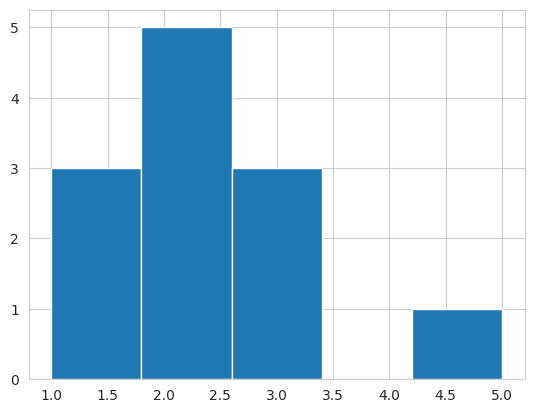

In [25]:
plt.hist(myDf['D'], bins=5)